### ML-A2 Predict Heart Attack using Logistic Regression

Instructions
- Prepare a report to present your findings 
- Write a python code to implement logistic regression from scratch for the given heart attack analysis and prediction dataset.
- Implement the logistic regression using scikit-learn in the given dataset. 

Dataset: Heart Attack Analysis & Prediction Dataset [kaggle.com](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data)


Instructions:
Submission should include python notebook file for all the implementations.

#### Load the module and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data

import pandas as pd

df_heart_attack = pd.read_csv('/home/suman/Applied-Machine-Learning/Logistic Regression/heart.csv')
df_heart_attack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# basic shape and size of the the data
print("The shape of the dataset is : ", df_heart_attack.shape)
print(f'The train dataset contains {df_heart_attack.shape[0]} rows and {df_heart_attack.shape[1]} columns.')

The shape of the dataset is :  (303, 14)
The train dataset contains 303 rows and 14 columns.


### Basic Data Exploration and Understanding

**Attributes of the Dataset**

| Column    | Description                                                                                      |
|-----------|--------------------------------------------------------------------------------------------------|
| age       | Age of the patient                                                                               |
| sex       | Sex of the patient                                                                               |
| exang     | Exercise induced angina (1 = yes; 0 = no)                                                        |
| caa       | Number of major vessels (0-3)                                                                    |
| cp        | Chest pain type                                                                                  |
|           | Value 1: Typical angina                                                                          |
|           | Value 2: Atypical angina                                                                         |
|           | Value 3: Non-anginal pain                                                                        |
|           | Value 4: Asymptomatic                                                                            |
| trtbps    | Resting blood pressure (in mm Hg)                                                                |
| chol      | Cholesterol in mg/dl fetched via BMI sensor                                                      |
| fbs       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                            |
| rest_ecg  | Resting electrocardiographic results                                                             |
|           | Value 0: Normal                                                                                  |
|           | Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression > 0.05 mV) |
|           | Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria            |
| thalach   | Maximum heart rate achieved                                                                      |
| slp       | Slope of the peak exercise ST segment                                                            |
| thall     | Thalassemia rate                                                                                 |
| output    | 0 = Less chance of heart attack; 1 = More chance of heart attack                                  |



In [4]:
# info of the dateset
df_heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- since we are solving logistic regression problem, the target or dependent variable must be discrete and here we can see that it is discrete which is `output`
- the categorical features are: `['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']`
- the continuous cols are :  `['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']`
- the target variable is :   `['output']`

### Basic EDA and Visualization

In [5]:
categorical_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous_features = ["age","trtbps","chol","thalachh","oldpeak"]
target_variable = ["output"]
print("The categorial cols are : ", categorical_features)
print("The continuous cols are : ", continous_features)
print("The target variable is :  ", target_variable)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [6]:
df_heart_attack[continous_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
# let's drop the duplicates
df_heart_attack.duplicated().sum()
df_heart_attack.drop_duplicates(inplace=True)

In [8]:
# checkout missing values
df_heart_attack.isnull().sum()

# since there are no null values, we don't have to worry about the missing data.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

The features `trtbps`, `oldpeak` and `chol` have distributions that are skewed, which means their data isn't symmetrically spread out. Instead, there's a bit of a lean to one side.

Outliers are values that are way off from the rest of the data points, like if most people's cholesterol levels are around 200, but then you have a few people with levels up near 400. These outliers can really affect our analysis and any models we build because they're so different from the typical values.

This skewness and the presence of outliers can affect how we analyze the data and how our models perform, so it's something to keep an eye on.

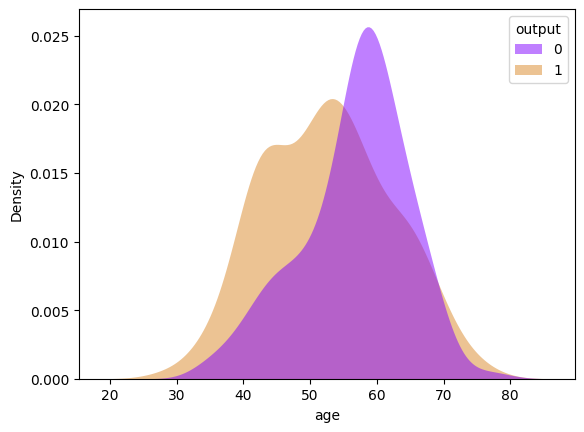

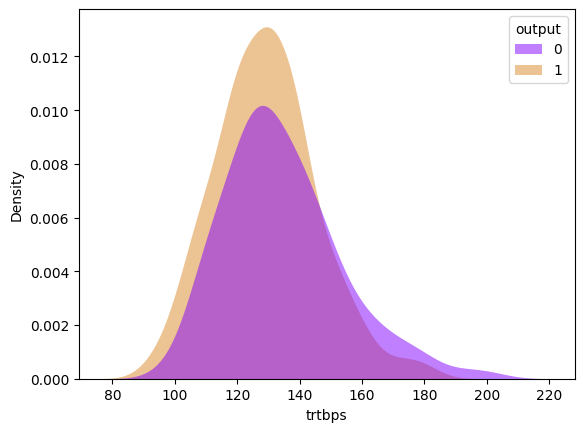

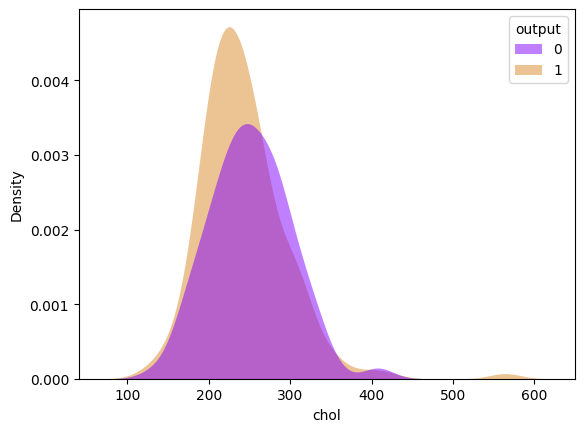

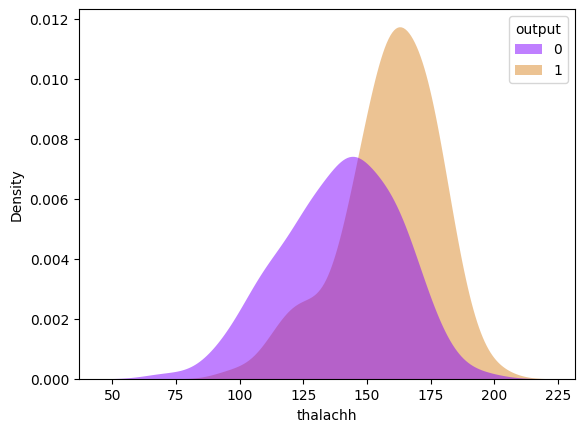

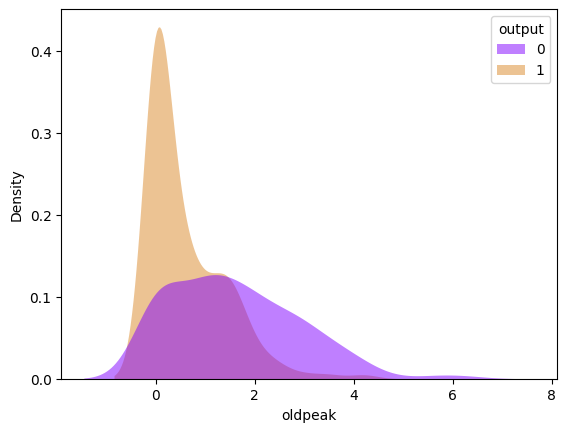

In [9]:
# distribution of continous variable vs target
for features in continous_features:
    sns.kdeplot(data=df_heart_attack, x=features, hue='output', fill=True, palette=["#8000ff", "#da8829"], alpha=0.5, linewidth=0)
    plt.show()

- It is intuitive that elder people might have higher chances of heart attack but according to the distribution plot of `age` wrt `output`, it is evident that this isn't the case.
- According to the distribution plot of `thalachh` wrt `output`, people with higher maximum heart rate achieved have higher chances of heart attack.
- According to the distribution plot of `oldpeak` wrt `output`, people with lower pevious peak achieved have higher chances of heart attack.

#### Co-relation among the features

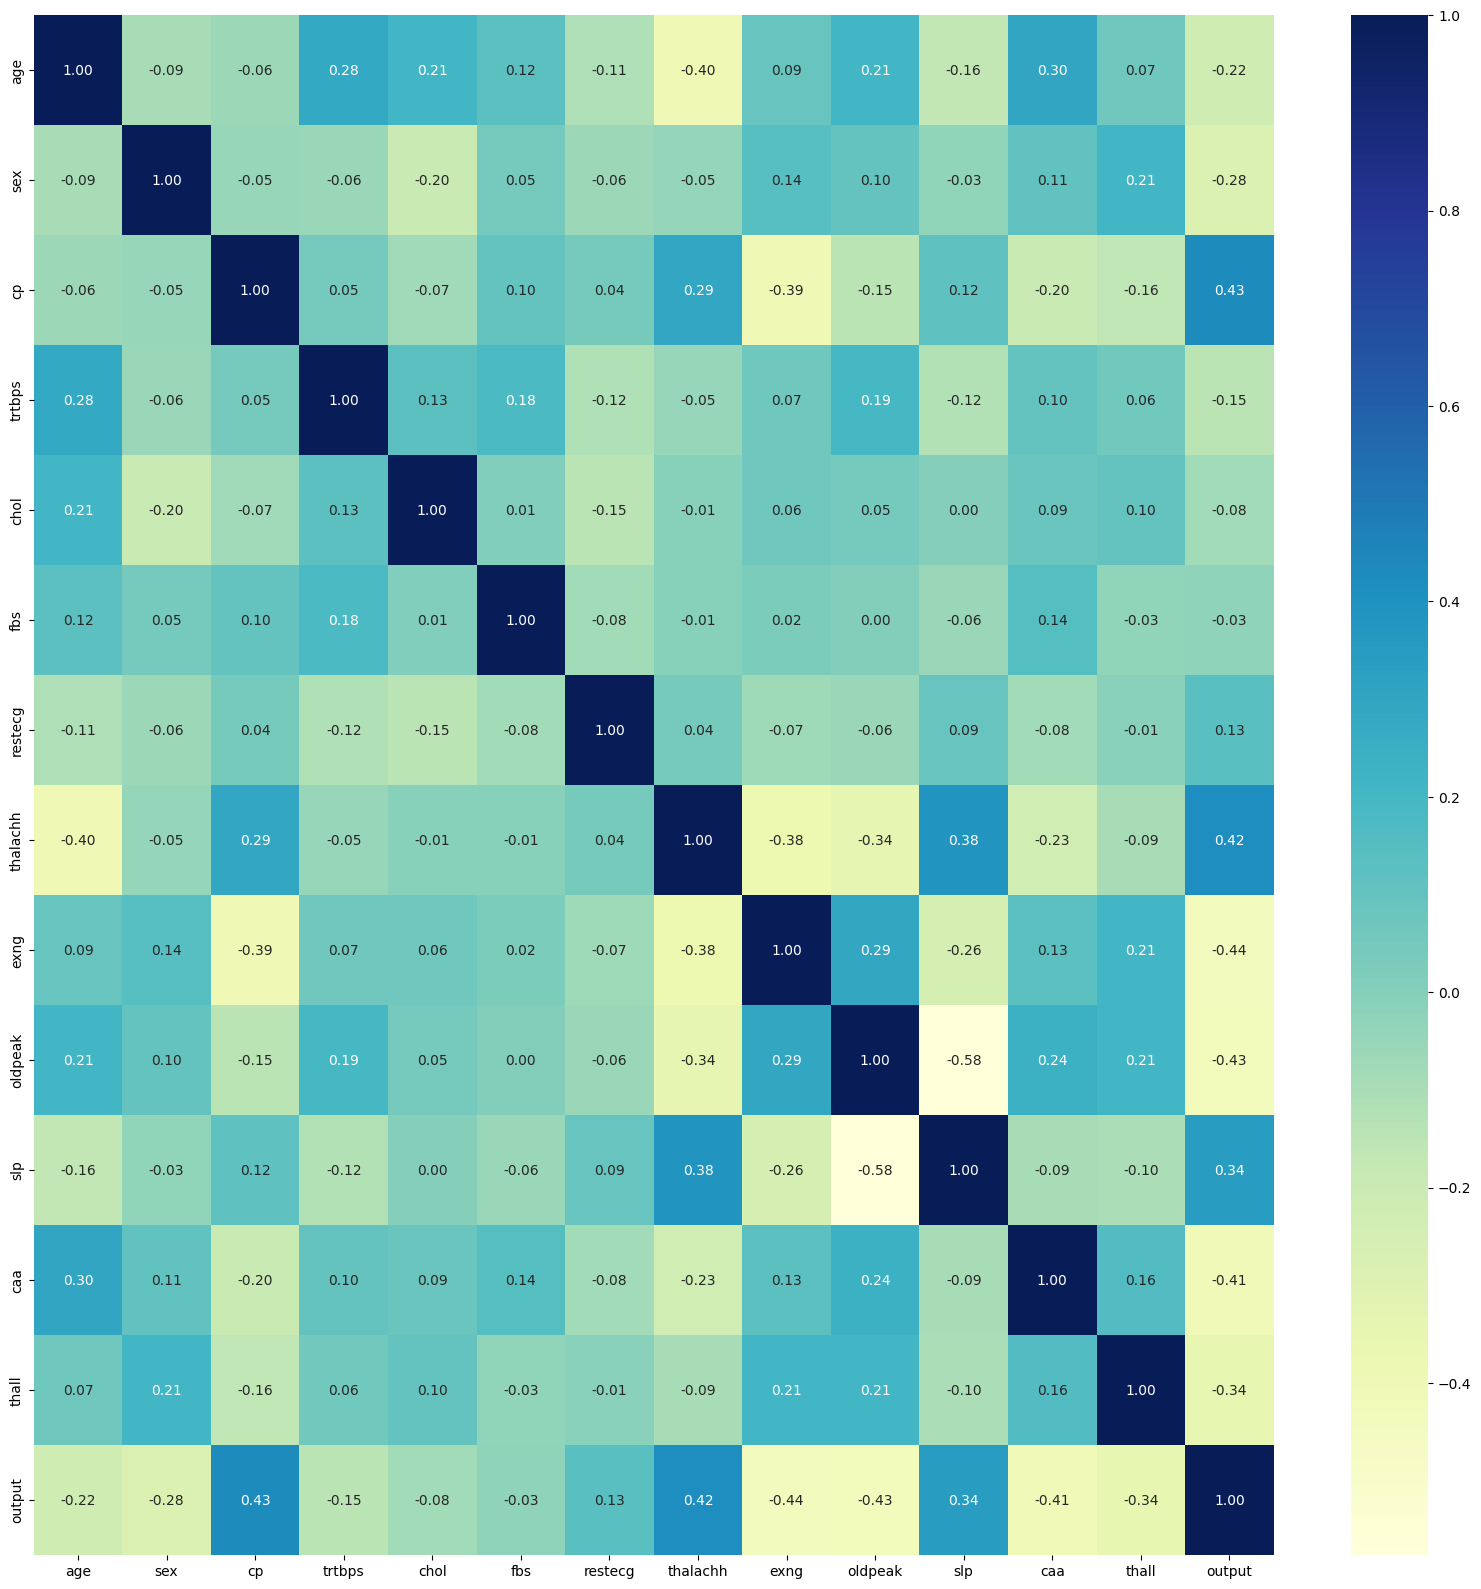

In [10]:
#large the map
plt.figure(figsize=(20, 20))  # Adjust the numbers as needed

# Create the heatmap
sns.heatmap(df_heart_attack.corr(), cmap='YlGnBu', annot=True,fmt='.2f')
plt.show()

summary of the useful correlations:

1. **Age:**
   - **thalachh**: Correlation of -0.40 (Moderate negative correlation)
     - Older patients tend to have a lower maximum heart rate achieved.

2. **Sex:**
   - **output**: Correlation of -0.281 (Weak negative correlation)
     - Indicates that males (coded as 1) are slightly less likely to have a higher chance of heart attack.

3. **cp (Chest Pain Type):**
   - **output**: Correlation of 0.434 (Moderate positive correlation)
     - Patients with certain chest pain types have a higher chance of heart attack.

4. **thalachh (Maximum Heart Rate Achieved):**
   - **output**: Correlation of 0.422 (Moderate positive correlation)
     - A higher maximum heart rate is associated with a higher chance of heart attack.
   - **exng**: Correlation of -0.379 (Moderate negative correlation)
     - Exercise-induced angina is less likely in those with a higher maximum heart rate.

5. **exng (Exercise Induced Angina):**
   - **output**: Correlation of -0.437 (Moderate negative correlation)
     - If exercise induces angina, the chance of heart attack is higher.

6. **oldpeak (ST depression induced by exercise):**
   - **output**: Correlation of -0.431 (Moderate negative correlation)
     - Higher ST depression is associated with a higher chance of heart attack.

7. **slp (Slope of the Peak Exercise ST Segment):**
   - **output**: Correlation of 0.346 (Moderate positive correlation)
     - A better (upsloping) ST segment during peak exercise is associated with a lower chance of heart attack.

8. **caa (Number of Major Vessels):**
   - **output**: Correlation of -0.392 (Moderate negative correlation)
     - The more major vessels that are blocked, the higher the chance of heart attack.

- **Chest pain type (cp)**, **thalachh (max heart rate)**, **exng (exercise-induced angina)**, **oldpeak (ST depression)**, **slp (slope of peak exercise ST segment)**, and **caa (number of major vessels)** show meaningful correlations with the **output** (chance of heart attack).
- **Age** and **thalachh** also show a strong negative correlation, indicating that older patients tend to have lower maximum heart rates. 

These correlations suggest important relationships between certain features and the likelihood of a heart attack, which can be useful for predictive modeling.

In [11]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


df1 = df_heart_attack.copy()

# Define categorical and continuous columns
cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
con_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
output = ['output']


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [13]:
X = df_heart_attack.drop('output', axis=1)
y = df_heart_attack['output']

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


In [15]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, con_cols), 
    ],
    remainder='passthrough'
)

In [17]:
np.random.seed(32)

In [18]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=32)) 
])

In [19]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.84


In [20]:
print(classification_report(y_test, y_pred))
print(f'Accuracy of the model: {accuracy_score(y_test,y_pred):.2f}')
print(f'Precision of the model: {precision_score(y_test,y_pred):.2f}')
print(f'Recall of the model: {recall_score(y_test,y_pred):.2f}')
print(f'F1 score of the model: {f1_score(y_test,y_pred):.2f}')



              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy of the model: 0.84
Precision of the model: 0.87
Recall of the model: 0.81
F1 score of the model: 0.84


In [21]:
def plot_confusion_matrix(y_true, y_pred, label_names):
    cm = confusion_matrix(y_true, y_pred, labels=label_names)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels = label_names)
    cm_disp.plot()
    plt.show()

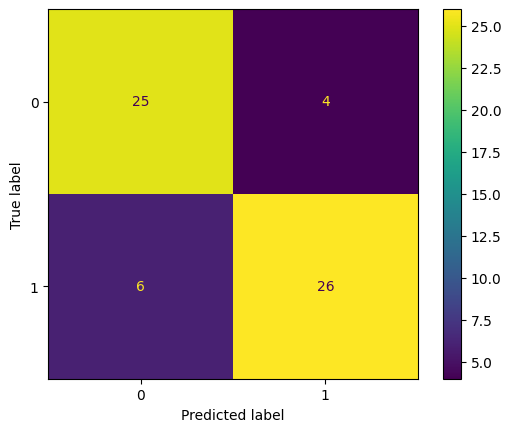

In [22]:
plot_confusion_matrix(y_test, y_pred, [0, 1])

In [23]:
def plot_roc_curve(y_test, y_pred_proba):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    

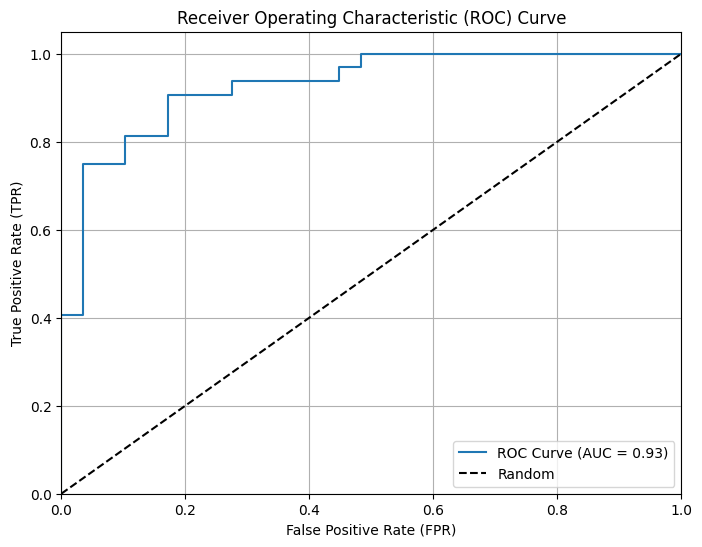

In [24]:
plot_roc_curve(y_test, y_pred_proba[:, 1])

## Logistic Regression From Scratch

<a name="2.3"></a>
### Sigmoid function

for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function from scratch.



In [25]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [28]:
def initialize_params(dim):
  np.random.seed(42)
  weights = np.random.rand(dim)
  bias = 1
  return weights, bias


In [29]:
def propagate(weights, bias, X, y):
  m = X.shape[1]  # number of samples

  # Forward propagation
  # Compute activation
  activation = sigmoid(np.dot(weights.T, X) + bias)
  # Compute cost
  cost = -(1/m) * np.sum(y*np.log(activation) + (1-y)*np.log(1-activation))

  # Backward propagation
  dw = (1/m) * np.dot(X, (activation - y).T)
  db = (1/m) * np.sum(activation - y)

  gradients = {"dw": dw, "db": db}

  return gradients, cost


In [31]:
from tqdm import tqdm
def optimize(weights, bias, X, y, num_epochs, learning_rate):
  costs = []
  for i in tqdm(range(num_epochs)):
    gradients, cost = propagate(weights, bias, X, y)
    # Retrieve derivatives from gradients
    dw = gradients["dw"]
    db = gradients["db"]
    # Update parameters
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db

    # Record the cost
    if i % 100 == 0:
      costs.append(cost)
      print(f"Cost after iteration {i}: {cost}")

  params = {"w": weights, "b": bias}
  gradients = {"dw": dw, "db": db}
  return params, gradients, costs


In [32]:
def predict(weights, bias, X):
  m = X.shape[1]
  y_predict = np.zeros((1, m))
  activation = sigmoid(np.dot(weights.T, X) + bias)

  for i in range(activation.shape[1]):
    # Convert probabilities to binary predictions
    y_predict[0, i] = 1 if activation[0, i] > 0.5 else 0

  return y_predict


In [33]:
def train_model(X_train, y_train, X_test, y_test,
                num_epochs=20000, learning_rate=0.001):
    # Initialize parameters
    weights, bias = initialize_params(X_train.shape[0])

    # Gradient descent
    parameters, gradients, costs = optimize(weights, bias, X_train,
                                            y_train, num_epochs,
                                            learning_rate)

    # Retrieve parameters
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100}%")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100}%")

    results = {"costs": costs,
               "Y_prediction_test": Y_prediction_test,
               "Y_prediction_train": Y_prediction_train,
               "w": w,
               "b": b,
               "learning_rate": learning_rate,
               "num_iterations": num_epochs}

    return results


In [34]:
# Ensure X_train and X_test are of shape (n_features, n_samples)

scaler = StandardScaler()
lr_X_train = scaler.fit_transform(X_train).T
lr_X_test = scaler.transform(X_test).T


# Ensure y_train is of shape (1, n_samples)
# Convert y_train and y_test from Series to NumPy arrays
# Now y_train is a 2D array with shape (1, n_samples)
lr_y_train = y_train.values.reshape(1, -1)
# Same for y_test
lr_y_test = y_test.values.reshape(1, -1)


print(lr_X_train.shape)
print(lr_y_train.shape)

print(lr_X_test.shape)
print(lr_y_test.shape)

(13, 241)
(1, 241)
(13, 61)
(1, 61)


In [35]:
logistic_regression_model = train_model(lr_X_train, lr_y_train, lr_X_test,
                                        lr_y_test, num_epochs=20000,
                                        learning_rate=0.001)


  5%|▌         | 1088/20000 [00:00<00:03, 5676.61it/s]

Cost after iteration 0: 1.741579893213625
Cost after iteration 100: 17.817313488107644
Cost after iteration 200: 17.00470993789753
Cost after iteration 300: 16.261000885815637
Cost after iteration 400: 15.57819072452478
Cost after iteration 500: 14.94945678980391
Cost after iteration 600: 14.369040394078233
Cost after iteration 700: 13.832082085754033
Cost after iteration 800: 13.334447588155594
Cost after iteration 900: 12.872573208838439
Cost after iteration 1000: 12.443342076342287


 12%|█▏        | 2350/20000 [00:00<00:02, 6108.37it/s]

Cost after iteration 1100: 12.043991162628396
Cost after iteration 1200: 11.672043869546947
Cost after iteration 1300: 11.325261829469166
Cost after iteration 1400: 11.001610316744902
Cost after iteration 1500: 10.699232936032084
Cost after iteration 1600: 10.416432451112607
Cost after iteration 1700: 10.151655578875218
Cost after iteration 1800: 9.903480301668868
Cost after iteration 1900: 9.670604788985676
Cost after iteration 2000: 9.451837403507197
Cost after iteration 2100: 9.246087524815787
Cost after iteration 2200: 9.052357080070829
Cost after iteration 2300: 8.869732747741283


 15%|█▍        | 2961/20000 [00:00<00:02, 5850.18it/s]

Cost after iteration 2400: 8.697378821702271
Cost after iteration 2500: 8.534530711744136
Cost after iteration 2600: 8.380489033123132
Cost after iteration 2700: 8.234614217336832
Cost after iteration 2800: 8.09632156725618
Cost after iteration 2900: 7.965076683862019
Cost after iteration 3000: 7.8403912059404455
Cost after iteration 3100: 7.721818822694662
Cost after iteration 3200: 7.608951537037517
Cost after iteration 3300: 7.501416170825288
Cost after iteration 3400: 7.398871111167708
Cost after iteration 3500: 7.301003299648364
Cost after iteration 3600: 7.207525465222227


 21%|██▏       | 4266/20000 [00:00<00:02, 6077.19it/s]

Cost after iteration 3700: 7.118173598359773
Cost after iteration 3800: 7.03270466007455
Cost after iteration 3900: 6.950894515761527
Cost after iteration 4000: 6.872536080810791
Cost after iteration 4100: 6.797437662932336
Cost after iteration 4200: 6.725421485003682
Cost after iteration 4300: 6.656322371893227
Cost after iteration 4400: 6.589986584940744
Cost after iteration 4500: 6.526270788420924
Cost after iteration 4600: 6.4650411332317494
Cost after iteration 4700: 6.406172444125369
Cost after iteration 4800: 6.349547497953877


 30%|███       | 6075/20000 [00:01<00:02, 5913.99it/s]

Cost after iteration 4900: 6.295056381580259
Cost after iteration 5000: 6.242595919268075
Cost after iteration 5100: 6.192069160487203
Cost after iteration 5200: 6.143384920140746
Cost after iteration 5300: 6.096457364218506
Cost after iteration 5400: 6.051205634807766
Cost after iteration 5500: 6.0075535092372006
Cost after iteration 5600: 5.965429088891906
Cost after iteration 5700: 5.92476451391584
Cost after iteration 5800: 5.885495700613555
Cost after iteration 5900: 5.847562098878964
Cost after iteration 6000: 5.81090646741946
Cost after iteration 6100: 5.7754746649147295


 36%|███▋      | 7259/20000 [00:01<00:02, 5795.62it/s]

Cost after iteration 6200: 5.741215455557882
Cost after iteration 6300: 5.708080327679028
Cost after iteration 6400: 5.676023324355837
Cost after iteration 6500: 5.645000885078818
Cost after iteration 6600: 5.614971697668263
Cost after iteration 6700: 5.585896559740949
Cost after iteration 6800: 5.557738249103604
Cost after iteration 6900: 5.530461402511588
Cost after iteration 7000: 5.504032402279194
Cost after iteration 7100: 5.478419270266054
Cost after iteration 7200: 5.453591568794795
Cost after iteration 7300: 5.429520308080579


 42%|████▏     | 8412/20000 [00:01<00:02, 5643.43it/s]

Cost after iteration 7400: 5.406177859775148
Cost after iteration 7500: 5.383537876247538
Cost after iteration 7600: 5.361575215241672
Cost after iteration 7700: 5.340265869568233
Cost after iteration 7800: 5.319586901504699
Cost after iteration 7900: 5.299516381593709
Cost after iteration 8000: 5.2800333315459165
Cost after iteration 8100: 5.2611176709692185
Cost after iteration 8200: 5.242750167661845
Cost after iteration 8300: 5.22491239122203
Cost after iteration 8400: 5.207586669741886
Cost after iteration 8500: 5.190756049367619


 48%|████▊     | 9623/20000 [00:01<00:01, 5860.78it/s]

Cost after iteration 8600: 5.1744042565221795
Cost after iteration 8700: 5.158515662599983
Cost after iteration 8800: 5.143075250956116
Cost after iteration 8900: 5.128068586024801
Cost after iteration 9000: 5.113481784413443
Cost after iteration 9100: 5.099301487829588
Cost after iteration 9200: 5.0855148377084465
Cost after iteration 9300: 5.072109451418284
Cost after iteration 9400: 5.059073399930079
Cost after iteration 9500: 5.0463951868462456
Cost after iteration 9600: 5.034063728691118
Cost after iteration 9700: 5.022068336373167
Cost after iteration 9800: 5.010398697735729


 54%|█████▍    | 10803/20000 [00:01<00:01, 5801.56it/s]

Cost after iteration 9900: 4.999044861119285
Cost after iteration 10000: 4.987997219864144
Cost after iteration 10100: 4.977246497687794
Cost after iteration 10200: 4.966783734876115
Cost after iteration 10300: 4.956600275232267
Cost after iteration 10400: 4.946687753731318
Cost after iteration 10500: 4.937038084832571
Cost after iteration 10600: 4.927643451405196
Cost after iteration 10700: 4.918496294226089
Cost after iteration 10800: 4.909589302011974
Cost after iteration 10900: 4.900915401950607
Cost after iteration 11000: 4.892467750698598


 60%|██████    | 12031/20000 [00:02<00:01, 5976.20it/s]

Cost after iteration 11100: 4.884239725815714
Cost after iteration 11200: 4.876224917607884
Cost after iteration 11300: 4.868417121353063
Cost after iteration 11400: 4.860810329886139
Cost after iteration 11500: 4.85339872652074
Cost after iteration 11600: 4.84617667828748
Cost after iteration 11700: 4.839138729469661
Cost after iteration 11800: 4.832279595418827
Cost after iteration 11900: 4.82559415663388
Cost after iteration 12000: 4.819077453088613
Cost after iteration 12100: 4.812724678793603
Cost after iteration 12200: 4.806531176579473
Cost after iteration 12300: 4.80049243308937


 66%|██████▋   | 13259/20000 [00:02<00:01, 5879.88it/s]

Cost after iteration 12400: 4.794604073969428
Cost after iteration 12500: 4.788861859246768
Cost after iteration 12600: 4.783261678885277
Cost after iteration 12700: 4.777799548510132
Cost after iteration 12800: 4.772471605292606
Cost after iteration 12900: 4.76727410398731
Cost after iteration 13000: 4.762203413114516
Cost after iteration 13100: 4.757256011280709
Cost after iteration 13200: 4.752428483630961
Cost after iteration 13300: 4.74771751842714
Cost after iteration 13400: 4.743119903746328
Cost after iteration 13500: 4.73863252429419


 72%|███████▏  | 14438/20000 [00:02<00:01, 5518.07it/s]

Cost after iteration 13600: 4.734252358328374
Cost after iteration 13700: 4.7299764746872714
Cost after iteration 13800: 4.725802029919804
Cost after iteration 13900: 4.721726265512103
Cost after iteration 14000: 4.7177465052072325
Cost after iteration 14100: 4.71386015241428
Cost after iteration 14200: 4.71006468770336
Cost after iteration 14300: 4.70635766638328
Cost after iteration 14400: 4.70273671615874
Cost after iteration 14500: 4.6991995348641495
Cost after iteration 14600: 4.695743888271254


 78%|███████▊  | 15666/20000 [00:02<00:00, 5866.64it/s]

Cost after iteration 14700: 4.692367607967929
Cost after iteration 14800: 4.689068589305602
Cost after iteration 14900: 4.685844789412891
Cost after iteration 15000: 4.682694225273171
Cost after iteration 15100: 4.679614971863852
Cost after iteration 15200: 4.676605160355284
Cost after iteration 15300: 4.673662976367265
Cost after iteration 15400: 4.670786658281214
Cost after iteration 15500: 4.6679744956061855
Cost after iteration 15600: 4.665224827396907
Cost after iteration 15700: 4.662536040722172
Cost after iteration 15800: 4.659906569181911
Cost after iteration 15900: 4.657334891471378


 84%|████████▍ | 16893/20000 [00:02<00:00, 5934.31it/s]

Cost after iteration 16000: 4.654819529990927
Cost after iteration 16100: 4.652359049499889
Cost after iteration 16200: 4.649952055813165
Cost after iteration 16300: 4.647597194539138
Cost after iteration 16400: 4.645293149857603
Cost after iteration 16500: 4.6430386433364195
Cost after iteration 16600: 4.640832432785679
Cost after iteration 16700: 4.6386733111481675
Cost after iteration 16800: 4.636560105424994
Cost after iteration 16900: 4.634491675635255
Cost after iteration 17000: 4.632466913808652
Cost after iteration 17100: 4.630484743010037
Cost after iteration 17200: 4.628544116394851


 90%|█████████ | 18094/20000 [00:03<00:00, 5968.47it/s]

Cost after iteration 17300: 4.626644016294486
Cost after iteration 17400: 4.6247834533306325
Cost after iteration 17500: 4.622961465557659
Cost after iteration 17600: 4.621177117632181
Cost after iteration 17700: 4.619429500008906
Cost after iteration 17800: 4.617717728161971
Cost after iteration 17900: 4.616040941830907
Cost after iteration 18000: 4.614398304290491
Cost after iteration 18100: 4.6127890016437005
Cost after iteration 18200: 4.6112122421370385
Cost after iteration 18300: 4.609667255497522
Cost after iteration 18400: 4.608153292290627
Cost after iteration 18500: 4.6066696232985285


 97%|█████████▋| 19394/20000 [00:03<00:00, 6256.70it/s]

Cost after iteration 18600: 4.6052155389179985
Cost after iteration 18700: 4.6037903485773
Cost after iteration 18800: 4.602393380171491
Cost after iteration 18900: 4.601023979515548
Cost after iteration 19000: 4.5996815098147295
Cost after iteration 19100: 4.598365351151614
Cost after iteration 19200: 4.597074899989298
Cost after iteration 19300: 4.595809568690221
Cost after iteration 19400: 4.594568785050106
Cost after iteration 19500: 4.59335199184655
Cost after iteration 19600: 4.592158646401759
Cost after iteration 19700: 4.590988220159011
Cost after iteration 19800: 4.589840198272359
Cost after iteration 19900: 4.588714079209188


100%|██████████| 20000/20000 [00:03<00:00, 5888.61it/s]

train accuracy: 86.30705394190872%
test accuracy: 83.60655737704919%


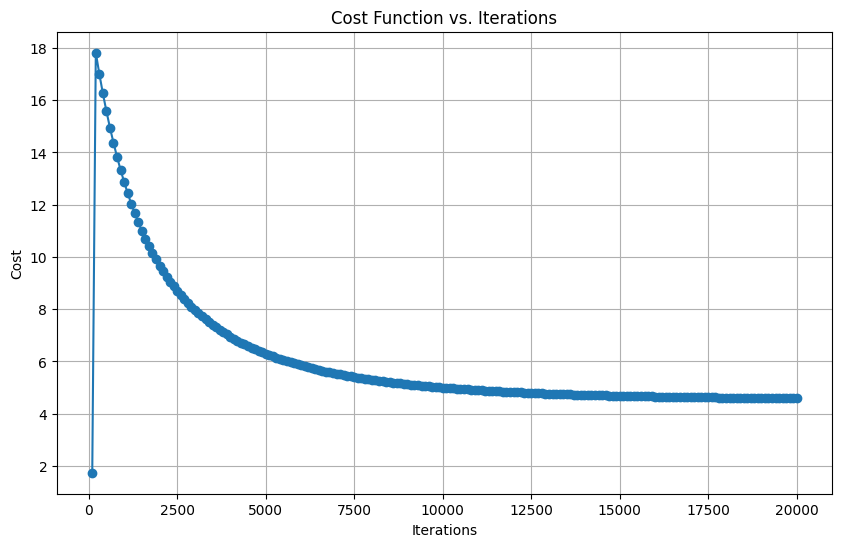

In [36]:
num_epochs = 20000
# Create the x-axis values (iteration numbers)
iterations_list = [i for i in range(100, num_epochs + 1, 100)]

# Plot the costs
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, logistic_regression_model.get('costs'), marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.grid(True)
plt.show()


<a name="2.4"></a>
### Cost function for logistic regression


for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$



<a name="2.5"></a>
### Gradient for logistic regression

gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously

In [37]:
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, epoch, alpha, random_state):
        self.epoch = epoch
        self.alpha = alpha
        self.random_state = random_state
        self.losses = []

    def add_bias_feature(self):
        to_concat = np.ones((self.X.shape[0], 1))
        self.X = np.concatenate((to_concat, self.X), axis=1)

    def initialize_params(self):
        # self.W = np.random.randn(1, self.num_feature) * 0.001
        self.W = np.zeros((1, self.num_feature))
    
    @staticmethod
    def sigmoid(Z):
        return (1/(1 + np.exp(-Z)))

    def forward_prop(self):
        Z = self.W@self.X
        A = LogisticRegressionScratch.sigmoid(Z)
        return A

    def get_cost(self, A):
        # cost = (-1/self.m) * np.sum(self.y * np.log(A) + (1 - self.y) * np.log(1 - A))
        cost = (-1/self.m) * np.sum(self.y * np.log(A) + (1 - self.y) * np.log(1 - A), axis=-1)
        self.losses.append(cost)
        return cost

    def backward_prop(self, A):
        dW = -((self.y - A) @ self.X.T)
        return dW

    def update_params(self, A):
        dW = self.backward_prop(A)
        self.W -= (self.alpha * dW)
    
    @staticmethod
    def print_training_stats(epoch, cost):
        for 
        print(f"Epoch {epoch}")
        print(f'Cost: {cost}')

    def predict_proba(self, X):
        to_concat = np.ones((X.shape[0], 1))
        X = np.concatenate((to_concat, X), axis=1)
        Z = self.W @ X.T
        y_pred_proba = LogisticRegressionScratch.sigmoid(Z)
        return y_pred_proba

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        y_pred = np.where(y_pred_proba>0.5, 1, 0).reshape(-1,)
        return y_pred
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.X, self.y = X, y
        self.add_bias_feature()
        self.X, self.y = self.X.T, self.y.values.reshape(1, -1)
        self.m, self.num_feature = self.X.shape[1], self.X.shape[0]
        self.initialize_params()

        for i in range(self.epoch):
            A = self.forward_prop()
            cost = self.get_cost(A)
            self.update_params(A)
            LogisticRegressionScratch.print_training_stats(i, cost)
        

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,classification_report,\
                            confusion_matrix, ConfusionMatrixDisplay


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=32)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# lr_sklearn = LogisticRegression(random_state=32, 
#                                 solver="sag")
# scaler_pipe = StandardScaler()
# # lr_sklearn_pipe = make_pipeline(("standard_scaler", scaler_pipe),
# #                                 "modeling", lr_sklearn)
# lr_sklearn_pipe = make_pipeline((scaler_pipe),
#                                 lr_sklearn)
# lr_sklearn_pipe.fit(X_train, y_train)

epoch = 100
alpha = 0.001
random_state = 42
y_train_scratch = y_train.values
lr = LogisticRegressionScratch(epoch=epoch, alpha=alpha, random_state=random_state)
lr.fit(X_train_scaled, y_train)

Epoch 0
Cost: [0.69314718]
Epoch 1
Cost: [0.62168154]
Epoch 2
Cost: [0.57129561]
Epoch 3
Cost: [0.53492208]
Epoch 4
Cost: [0.50790163]
Epoch 5
Cost: [0.48726323]
Epoch 6
Cost: [0.47110197]
Epoch 7
Cost: [0.45817003]
Epoch 8
Cost: [0.44762814]
Epoch 9
Cost: [0.43889642]
Epoch 10
Cost: [0.43156399]
Epoch 11
Cost: [0.42533287]
Epoch 12
Cost: [0.41998243]
Epoch 13
Cost: [0.41534621]
Epoch 14
Cost: [0.41129649]
Epoch 15
Cost: [0.40773377]
Epoch 16
Cost: [0.40457952]
Epoch 17
Cost: [0.40177093]
Epoch 18
Cost: [0.39925726]
Epoch 19
Cost: [0.39699704]
Epoch 20
Cost: [0.39495613]
Epoch 21
Cost: [0.39310614]
Epoch 22
Cost: [0.39142328]
Epoch 23
Cost: [0.3898875]
Epoch 24
Cost: [0.38848175]
Epoch 25
Cost: [0.38719147]
Epoch 26
Cost: [0.38600415]
Epoch 27
Cost: [0.38490899]
Epoch 28
Cost: [0.3838966]
Epoch 29
Cost: [0.38295879]
Epoch 30
Cost: [0.3820884]
Epoch 31
Cost: [0.38127912]
Epoch 32
Cost: [0.38052539]
Epoch 33
Cost: [0.37982227]
Epoch 34
Cost: [0.37916538]
Epoch 35
Cost: [0.37855081]
Epoch

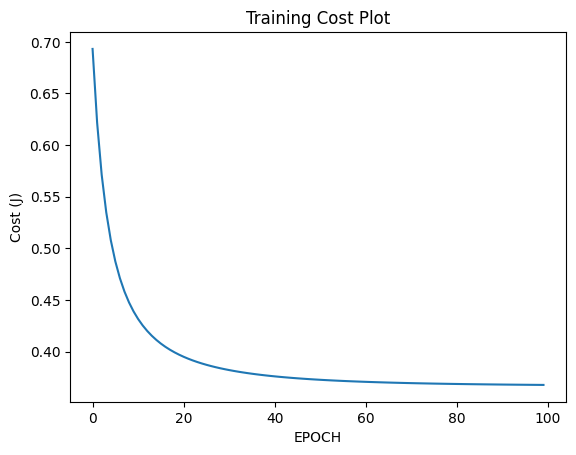

In [41]:
def display_cost(cost):
    plt.plot(cost)
    plt.title("Training Cost Plot")
    plt.xlabel("EPOCH")
    plt.ylabel("Cost (J)")

display_cost(lr.losses)